# We first include the libraries required for data analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

Load of the data



In [3]:
dataset=pd.read_csv('no_show_appointments.csv')

# we start to investigate the data and ask some questions

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

# we ask some questions to be able to analyze the data

1- what is the relation between Age and show up for the appointments ?
2- Does the gender have an effect on show up for the appointments or not ?
3- Are the more SMS sent the more show up for appointments increases ?

In [4]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
dataset.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning (missing values , duplicates and others)

Both appointment id and patient id have not any relation or effect on the dataset ,so we should remove both of the columns

In [6]:
dataset.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [7]:
dataset.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


we start to check for missing values and duplicated data

In [8]:
dataset.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
dataset.duplicated().sum()

635

There are no missing values and before to remove duplicates we will check for datatypes

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


we should convert both AppointmentDay and ScheduledDay to datetime datatype

In [11]:
#convert object datatype to datetime datatype
dataset['AppointmentDay']=pd.to_datetime(dataset['AppointmentDay'])

In [12]:
#convert object datatype to datetime datatype
dataset['ScheduledDay']=pd.to_datetime(dataset['ScheduledDay'])

In [13]:
#confirm change of datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


we return back to remove duplicated values

In [14]:
dataset.drop_duplicates(inplace=True)

In [15]:
#confirm removing duplicates
dataset.duplicated().sum()

0

If you notices from description of the data that the minimum value of the age is minus value and this is rejected ,so we should delete this row

In [16]:
dataset.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000,109892.000000
mean,37.089506,0.098287,0.197248,0.071825,0.030430,0.022131,0.322881
std,23.121196,0.297704,0.397923,0.258199,0.171768,0.160878,0.467580
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
#check for number or rows containing negative numbers or zeros
dataset[dataset['Age']<=0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


In [18]:
#we will delete these rows
index_ls=dataset[dataset['Age'] <= 0].index
dataset.drop(index_ls,axis=0,inplace = True)

In [19]:
#confirm deletion of rows
dataset[dataset['Age']<=0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now, the dataset is cleaned and ready for analysis

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( what is the relation between Age and show up for the appointments)

Now, We start to answer to the questions that we have asked before,
we start to visualize the data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd47ca7acc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd47c812a90>]], dtype=object)

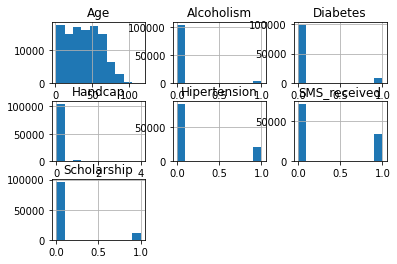

In [39]:
dataset.hist()

we notice that the data is right skewed ,hence it is possible that youg people have more probability to show up for the appointments

In [21]:
age_relation = dataset.groupby(['No-show']).Age.median()
age_relation

No-show
No     39
Yes    33
Name: Age, dtype: int64

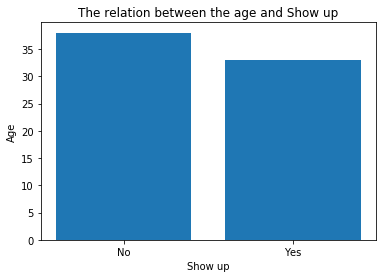

In [49]:
plt.bar(["Yes","No"],[33,38])
plt.title('The relation between the age and Show up')
plt.xlabel('Show up')
plt.ylabel('Age')
plt.show()


### Research Question 2  (Does the gender have an effect on show up for the appointments or not)

In [24]:
gender_relation = dataset.groupby(['No-show','Gender']).Gender.count()
gender_relation

No-show  Gender
No       F         55562
         M         29337
Yes      F         14137
         M          7325
Name: Gender, dtype: int64

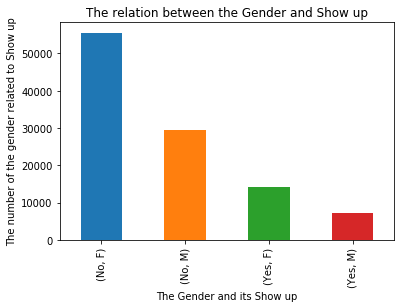

In [48]:
gender_relation.plot.bar()
plt.title('The relation between the Gender and Show up')
plt.xlabel('The Gender and its Show up')
plt.ylabel('The number of the gender related to Show up')
plt.show()

we notice that number of females that show up are more than the number of males

### Research Question 3  (Are the more SMS sent, the more show up for appointments increases)

In [28]:
SMS_relation = dataset.groupby(['No-show','SMS_received']).SMS_received.count()

In [29]:
SMS_relation

No-show  SMS_received
No       0               59882
         1               25017
Yes      0               11894
         1                9568
Name: SMS_received, dtype: int64

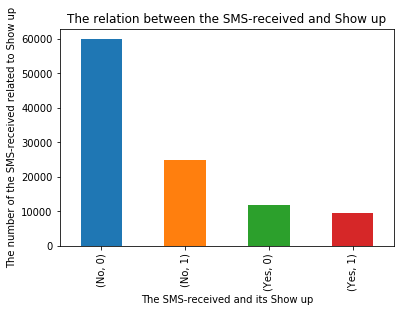

In [50]:
SMS_relation.plot.bar()
plt.title('The relation between the SMS-received and Show up')
plt.xlabel('The SMS-received and its Show up')
plt.ylabel('The number of the SMS-received related to Show up')
plt.show()

we notices that SMS received has no more effect on show up for the appointments

Conclusions

In [46]:
dataset['Age'].max()

115

we noticed the results and the relations between show up and other variables such as the gender ,age and SMS-received , and we showed that the number of young people increases show up , in addion to the number of females.
there are some limitations in the dataset in which there is a variable such as the age has a maximum value is 115 , and this means the dataset may have in accurate data.